In [2]:
#Import Data
import pandas as pd
survey_data = pd.read_csv(r'C:\Users\SREEHARI\Desktop\internship\my training\Chapter4_Decison_Trees\Datasets\Call_center_survey.csv')

#total number of customers
print(survey_data.shape)

(12330, 7)


In [3]:
#Column names
print(survey_data.columns)

Index(['Cust_id', 'Age', 'Account_balance', 'Personal_loan_ind',
       'Home_loan_ind', 'Prime_Customer_ind', 'Overall_Satisfaction'],
      dtype='object')


In [4]:
#Print Sample data
pd.set_option('display.max_columns', None) #This option displays all the columns

In [5]:
survey_data.head()

,Cust_id,Age,Account_balance,Personal_loan_ind,Home_loan_ind,Prime_Customer_ind,Overall_Satisfaction
0,CX01-001,49,23974,1,0,1,Dis Satisfied
1,CX01-002,25,72374,0,1,1,Satisfied
2,CX01-003,32,65532,0,0,1,Satisfied
3,CX01-004,70,28076,0,1,1,Dis Satisfied
4,CX01-005,23,38974,1,1,1,Satisfied


In [6]:
#Sample summary
summary=survey_data.describe()
round(summary,2)

,Age,Account_balance,Personal_loan_ind,Home_loan_ind,Prime_Customer_ind
count,12330.00,12330.00,12330.0,12330.0,12330.00
mean,44.77,41177.14,0.5,0.5,0.58
std,13.91,26432.60,0.5,0.5,0.49
min,19.00,4904.00,0.0,0.0,0.00
25%,35.00,20927.00,0.0,0.0,0.00
50%,43.00,34065.00,0.0,0.0,1.00
75%,55.00,60264.00,1.0,1.0,1.00
max,75.00,109776.00,1.0,1.0,1.00


In [7]:
#frequency counts table
survey_data['Overall_Satisfaction'].value_counts()
survey_data["Personal_loan_ind"].value_counts()
survey_data["Home_loan_ind"].value_counts()
survey_data["Prime_Customer_ind"].value_counts()

1    7113
0    5217
Name: Prime_Customer_ind, dtype: int64

In [8]:
#Non numerical data need to be mapped to numerical data. 
survey_data['Overall_Satisfaction'] = survey_data['Overall_Satisfaction'].map( {'Dis Satisfied': 0, 'Satisfied': 1} ).astype(int)

In [9]:
#number of satisfied customers
survey_data['Overall_Satisfaction'].value_counts()

0    6707
1    5623
Name: Overall_Satisfaction, dtype: int64

In [10]:
#Defining Features and lables, ignoring cust_num and target variable
features=list(survey_data.columns[1:6])
print(features)
#Preparing X and Y data
#X = survey_data[["Age", "Account_balance","Personal_loan_ind","Home_loan_ind","Prime_Customer_ind"]]
X = survey_data[features]
y = survey_data['Overall_Satisfaction']

['Age', 'Account_balance', 'Personal_loan_ind', 'Home_loan_ind', 'Prime_Customer_ind']


In [11]:
#Building Tree Model
from sklearn import tree
DT_Model = tree.DecisionTreeClassifier(max_depth=2)
DT_Model.fit(X,y)

DecisionTreeClassifier(max_depth=2)

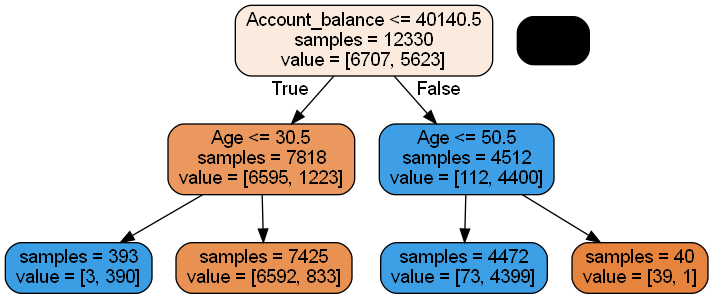

In [14]:
##Plotting the trees - Old Method

#Before drawing the graph below command on anaconda console
#pip install pydotplus 
#pip install graphviz

from IPython.display import Image
from six import StringIO

import pydotplus
dot_data = StringIO()
tree.export_graphviz(DT_Model, #Mention the model here
                     out_file = dot_data,
                     filled=True, 
                     rounded=True,
                     impurity=False,
                     feature_names = features)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [15]:
#Rules
print(dot_data.getvalue())

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="Account_balance <= 40140.5\nsamples = 12330\nvalue = [6707, 5623]", fillcolor="#fbebdf"] ;
1 [label="Age <= 30.5\nsamples = 7818\nvalue = [6595, 1223]", fillcolor="#ea985e"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="samples = 393\nvalue = [3, 390]", fillcolor="#3b9ee5"] ;
1 -> 2 ;
3 [label="samples = 7425\nvalue = [6592, 833]", fillcolor="#e89152"] ;
1 -> 3 ;
4 [label="Age <= 50.5\nsamples = 4512\nvalue = [112, 4400]", fillcolor="#3e9fe6"] ;
0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
5 [label="samples = 4472\nvalue = [73, 4399]", fillcolor="#3c9fe5"] ;
4 -> 5 ;
6 [label="samples = 40\nvalue = [39, 1]", fillcolor="#e6843e"] ;
4 -> 6 ;
}


|--- Account_balance <= 40140.50
|   |--- Age <= 30.50
|   |   |--- class: 1
|   |--- Age >  30.50
|   |   |--- class: 0
|--- Account_balance >  40140.50
|   |--- Age <= 50.50
|   |   |--- class: 1
|   |--- Age >  50.50
|   |   |--- class: 0



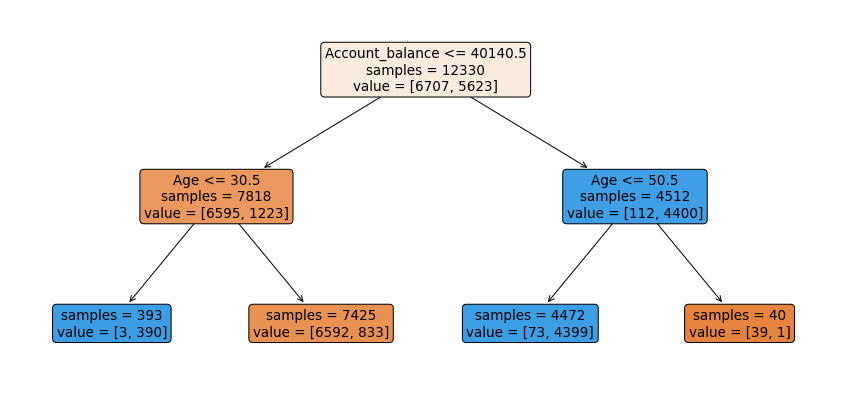

In [16]:
##Plotting the trees - New Method

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text
plt.figure(figsize=(15,7))
plot_tree(DT_Model, filled=True, 
                     rounded=True,
                     impurity=False,
                     feature_names = features)

print(export_text(DT_Model, feature_names = features))

In [17]:
#LAB : Tree Validation
########################################
##########Tree Validation
#Tree Validation
predict1 = DT_Model.predict(X)
print(predict1)

[0 1 1 ... 1 1 1]


In [18]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y, predict1)
print(cm)

[[6631   76]
 [ 834 4789]]


In [19]:
total = sum(sum(cm))
#####from confusion matrix calculate accuracy
accuracy = (cm[0,0]+cm[1,1])/total
print(accuracy)

0.9261962692619627


In [20]:
#LAB: Overfitting
#LAB: The problem of overfitting
############################################################################ 
##The problem of overfitting

import pandas as pd
overall_data = pd.read_csv(r"C:\Users\SREEHARI\Desktop\internship\my training\Chapter4_Decison_Trees\Datasets\Customer_profile_data.csv")

##print train.info()
print(overall_data.shape)

(109, 4)


In [21]:
#First few records
print(overall_data.head())

   Sr_no  Age  Gender Bought
0      1   45    Male    Yes
1      2   56    Male    Yes
2      3   49  Female    Yes
3      4   50  Female     No
4      5   75  Female     No


In [22]:
# the data have string values we need to convert them into numerical values
overall_data['Gender'] = overall_data['Gender'].map( {'Male': 1, 'Female': 0} ).astype(int)
overall_data['Bought'] = overall_data['Bought'].map({'Yes':1, 'No':0}).astype(int)

In [23]:
#First few records
print(overall_data.head())

   Sr_no  Age  Gender  Bought
0      1   45       1       1
1      2   56       1       1
2      3   49       0       1
3      4   50       0       0
4      5   75       0       0


In [24]:
#Defining features, X and Y
features = list(overall_data.columns[1:3])
print(features)

['Age', 'Gender']


In [25]:
X = overall_data[features]
y = overall_data['Bought']

In [26]:
print(X.shape)
print(y.shape)
#Dividing X and y to train and test data parts. The function train_test_split() takes care of it. Mention the train data percentage in the parameter train_size. 
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, train_size = 0.8 , random_state=5)

(109, 2)
(109,)


In [27]:
print("X_train.shape", X_train.shape)
print("y_train.shape",y_train.shape)
print("X_test.shape",X_test.shape)
print("y_test.shape",y_test.shape)

X_train.shape (87, 2)
y_train.shape (87,)
X_test.shape (22, 2)
y_test.shape (22,)


In [28]:
##print train.info()
##print test.info()

from sklearn import tree
#training Tree Model
DT_Model1 = tree.DecisionTreeClassifier()
DT_Model1.fit(X_train,y_train)

DecisionTreeClassifier()

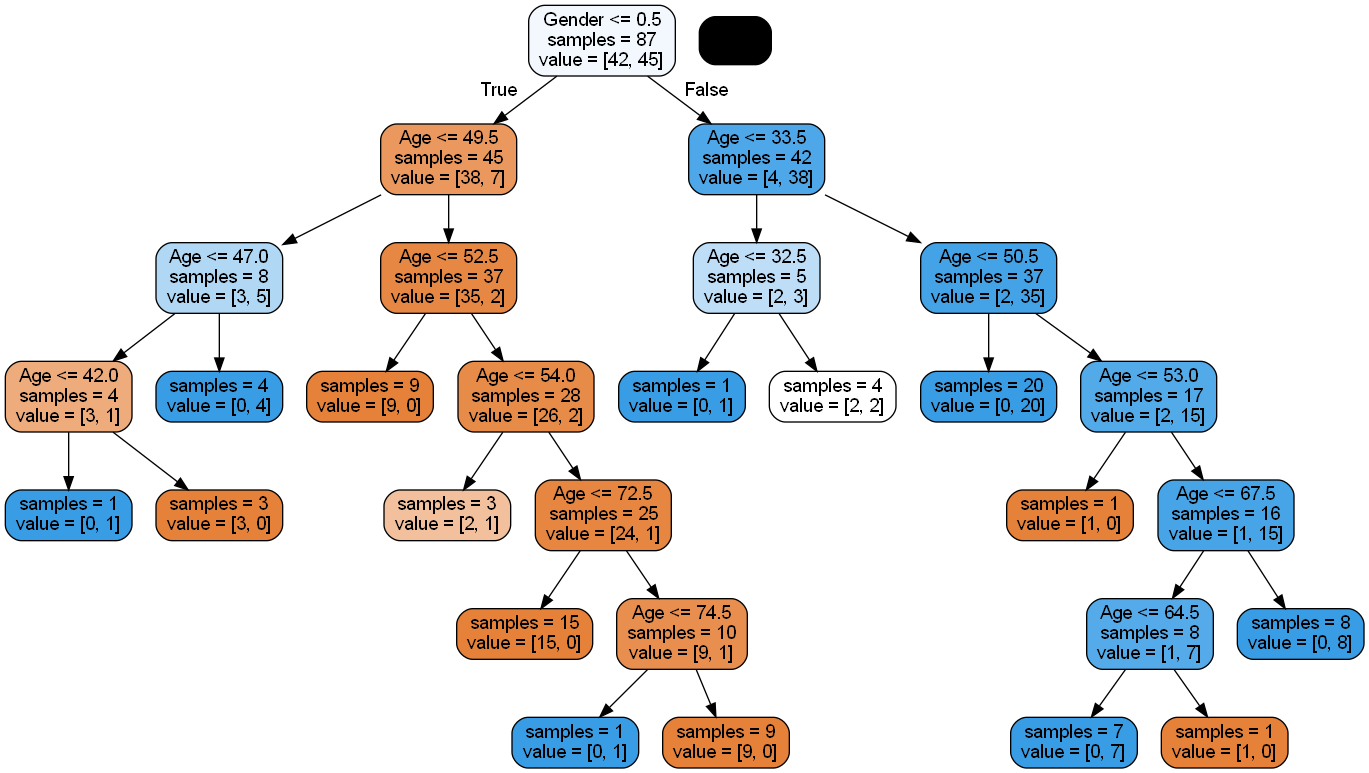

In [30]:
#Plotting the trees
from IPython.display import Image
from six import StringIO
import pydotplus
dot_data = StringIO()
tree.export_graphviz(DT_Model1,
                     out_file = dot_data,
                     feature_names = features,
                     filled=True, rounded=True,
                     impurity=False)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [31]:
#Accuracy on train data
from sklearn.metrics import confusion_matrix

predict1 = DT_Model1.predict(X_train)
cm1 = confusion_matrix(y_train,predict1)
total1 = sum(sum(cm1))
accuracy1 = (cm1[0,0]+cm1[1,1])/total1
print("Train accuracy", accuracy1)

Train accuracy 0.9655172413793104


In [32]:
#Accuracy on test data
predict2 = DT_Model1.predict(X_test)
cm2 = confusion_matrix(y_test,predict2)
total2 = sum(sum(cm2))
#####from confusion matrix calculate accuracy
accuracy2 = (cm2[0,0]+cm2[1,1])/total2
print("Test accuracy",accuracy2)

Test accuracy 0.7727272727272727


In [33]:
####LAB: Pruning
#### max_depth parameter 
DT_Model2 = tree.DecisionTreeClassifier(max_depth= 4)
DT_Model2.fit(X_train,y_train)

predict3 = DT_Model2.predict(X_train)
predict4 = DT_Model2.predict(X_test)

In [34]:
#Accuracy of the model on the train data
cm1 = confusion_matrix(y_train,predict3)
total1 = sum(sum(cm1))
accuracy1 = (cm1[0,0]+cm1[1,1])/total1
print("max_depth4 Train Accuracy", accuracy1)

max_depth4 Train Accuracy 0.9425287356321839


In [35]:
#Accuracy of the model on the Test Data
cm2 = confusion_matrix(y_test,predict4)
total2 = sum(sum(cm2))
accuracy2 = (cm2[0,0]+cm2[1,1])/total2
print("max_depth4 Test Accuracy", accuracy2)

max_depth4 Test Accuracy 0.7727272727272727


In [36]:
#### max_depth =2
DT_Model2 = tree.DecisionTreeClassifier(max_depth= 2)
DT_Model2.fit(X_train,y_train)

predict3 = DT_Model2.predict(X_train)
predict4 = DT_Model2.predict(X_test)

In [37]:
#Accuracy of the model on the train data
cm1 = confusion_matrix(y_train,predict3)
total1 = sum(sum(cm1))
accuracy1 = (cm1[0,0]+cm1[1,1])/total1
print("max_depth2 Train Accuracy", accuracy1)

max_depth2 Train Accuracy 0.896551724137931


In [38]:
#Accuracy of the model on the Test Data
cm2 = confusion_matrix(y_test,predict4)
total2 = sum(sum(cm2))
accuracy2 = (cm2[0,0]+cm2[1,1])/total2
print("max_depth2 Test Accuracy", accuracy2)

max_depth2 Test Accuracy 0.8636363636363636


In [39]:
#### The problem of underfitting
#### max_depth =1
DT_Model2 = tree.DecisionTreeClassifier(max_depth= 1)
DT_Model2.fit(X_train,y_train)

predict3 = DT_Model2.predict(X_train)
predict4 = DT_Model2.predict(X_test)

In [40]:
#Accuracy of the model on the train data
cm1 = confusion_matrix(y_train,predict3)
total1 = sum(sum(cm1))
accuracy1 = (cm1[0,0]+cm1[1,1])/total1
print("max_depth1 Train Accuracy", accuracy1)

max_depth1 Train Accuracy 0.8735632183908046


In [41]:
#Accuracy of the model on the Test Data
cm2 = confusion_matrix(y_test,predict4)
total2 = sum(sum(cm2))
accuracy2 = (cm2[0,0]+cm2[1,1])/total2
print("max_depth1 Test Accuracy", accuracy2)

max_depth1 Test Accuracy 0.8181818181818182


In [42]:
#### max_leaf_nodes =4
DT_Model3 = tree.DecisionTreeClassifier(max_leaf_nodes= 3)
DT_Model3.fit(X_train,y_train)

predict3 = DT_Model3.predict(X_train)
predict4 = DT_Model3.predict(X_test)

In [43]:
#Accuracy of the model on the train data
cm1 = confusion_matrix(y_train,predict3)
total1 = sum(sum(cm1))
accuracy1 = (cm1[0,0]+cm1[1,1])/total1
print(accuracy1)

0.896551724137931


In [44]:
#Accuracy of the model on the Test Data
cm2 = confusion_matrix(y_test,predict4)
total2 = sum(sum(cm2))
accuracy2 = (cm2[0,0]+cm2[1,1])/total2
print(accuracy2)

0.8636363636363636
